In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData02(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('e_jet')
    scalar.append('eta_jet')
    scalar.append('p_jet')
    scalar.append('pt_jet')
    scalar.append('phi_jet')
    scalar.append('phi_photon')
    scalar.append('pt_electron')
    scalar.append('e_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
def getDataJ(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid') 
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    
    scalar.append('eta_jet')
    scalar.append('p_jet')
    scalar.append('theta_jet')
    scalar.append('phi_jet')
    
    scalar.append('eta_electron')
    scalar.append('p_electron')
    scalar.append('pt_electron')
    scalar.append('theta_electron')  
    scalar.append('phi_photon')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [4]:
file1 = ["$HOME/EIC/output/102.root"]
file2 = ['$HOME/EIC/output/117.root'] # number of charged particles, netural hadrons and decay photons with R = 1.0
file3 = ["$HOME/EIC/output/1123.root"]
file4 = ["$HOME/EIC/output/123.root"]
file5 = ["$HOME/EIC/output/101.root"] # particles
file6 = ["$HOME/EIC/output/1209.root"] # number of charged particles, netural hadrons and decay photons with R = 0.5
file7 = ["$HOME/EIC/output/1211.root"] # number of charged particles, netural hadrons and decay photons with R = 0.7
file8 = ["$HOME/EIC/output/303.root"] # hadrons

In [5]:
a = getData02(file1)


Processed $HOME/EIC/output/102.root in 100.4 seconds



Remove extra jets 9009649  fraction kept: 24.8


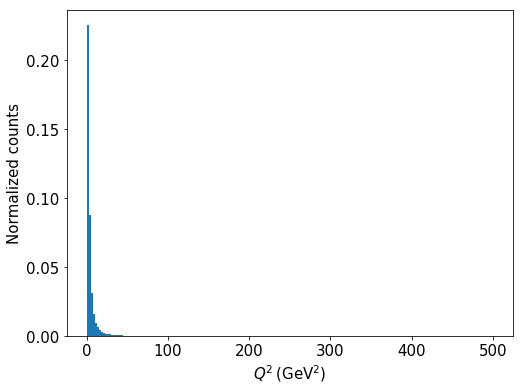

In [27]:
fig = plt.figure(figsize=(8,6))

plt.hist(keepOneJet(a)['Q2'], bins=200, range=(0,500), normed=True)
plt.xlabel('$Q^2 \, \mathrm{(GeV^2)}$', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/q2.pdf', bbox_inches='tight')

In [6]:
a1 = applyCut(a, 'Q2 > 16', 'Q2 > 16')
a1 = applyCut(a1, 'eta_jet > -0.7', 'eta_jet > -0.7')
a1 = applyCut(a1, 'eta_jet < 0.7', 'eta_jet < 0.7')

Q2 > 16 2200822  fraction kept: 6.1
eta_jet > -0.7 1935991  fraction kept: 88.0
eta_jet < 0.7 491516  fraction kept: 25.4


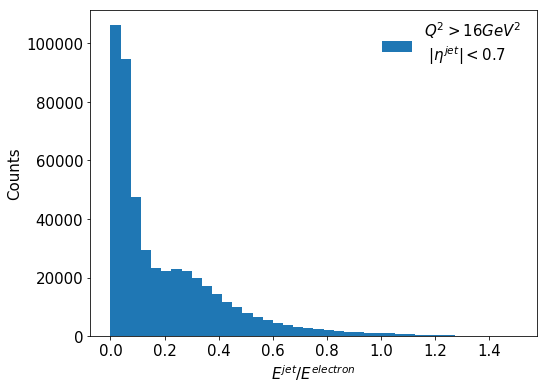

In [7]:
fig = plt.figure(figsize=(8,6))

plt.hist(a1['e_jet']/a1['e_electron'], range=(0,1.5), bins=40, label='$Q^2 > 16 GeV^2$ \n $|\eta^{jet}| < 0.7$')
plt.xlabel('$E^{jet} / E^{electron}$', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False)
plt.savefig('images/e ratio.pdf', bbox_inches='tight')

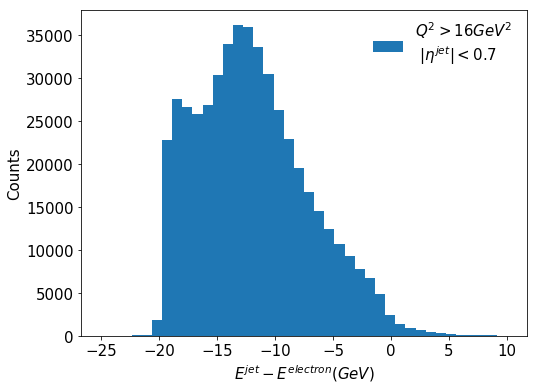

In [8]:
fig = plt.figure(figsize=(8,6))

plt.hist(a1['e_jet']-a1['e_electron'], range=(-25, 10), bins=40, label='$Q^2 > 16 GeV^2$ \n $|\eta^{jet}| < 0.7$')
plt.xlabel('$E^{jet} - E^{electron} (GeV)$', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False)
plt.savefig('images/e diff.pdf', bbox_inches='tight')

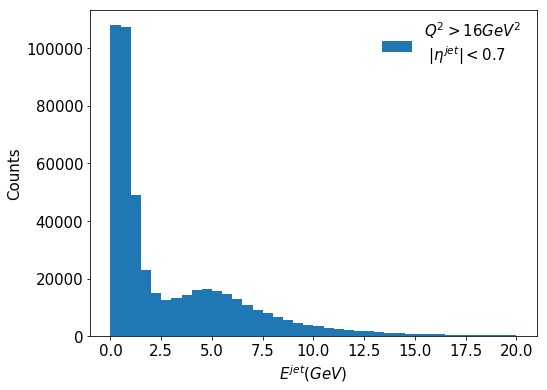

In [9]:
fig = plt.figure(figsize=(8,6))

plt.hist(a1['e_jet'], range=(0,20), bins=40, label='$Q^2 > 16 GeV^2$ \n $|\eta^{jet}| < 0.7$')
plt.xlabel('$E^{jet} (GeV)$', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False)
plt.savefig('images/e jet.pdf', bbox_inches='tight')


Remove extra jets 297847  fraction kept: 60.6


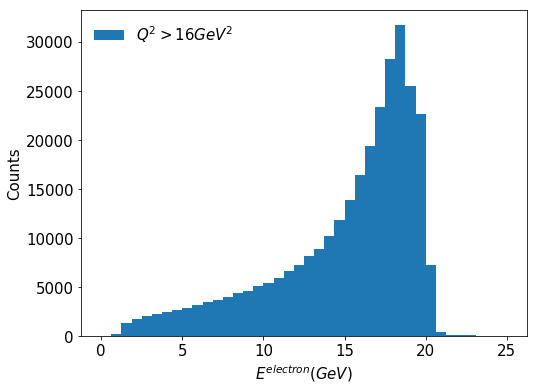

In [10]:
fig = plt.figure(figsize=(8,6))

plt.hist(keepOneJet(a1)['e_electron'], range=(0,25), bins=40, label='$Q^2 > 16 GeV^2$')
plt.xlabel('$E^{electron} (GeV)$', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False)
plt.savefig('images/e electron.pdf', bbox_inches='tight')

In [11]:
aj = getDataJ(file1)


Processed $HOME/EIC/output/102.root in 93.9 seconds


In [14]:
radii = [0, 10, 20, 30, 40]
r_labels = ['$0$','$10$','$20$','$30$','$40$']
radii_s = [0, 5, 10, 15, 20]
r_labels_s = ['$0$','$5$','$10$','$15$','$20$']
angles = [90, 139.604937421, 164.585373193, 174.299529125, 177.90141703, 180, 182.09858297, 185.700470875, 195.414626807,
          220.395062579, 270, 319.604937421, 344.585373193, 354.299529125, 357.90141703, 360]
eta_labels=['0','-1','-2','-3','','','','-3','-2','-1','0','1','2','3','']
nr = 40
nr_s = 20
ntheta = 90

In [12]:
jj = applyCut(aj, 'eta_jet > -0.7 and eta_jet < 0.7', 'eta_jet')
jj = applyCut(jj, 'Q2 > 16', 'Q2 > 16')
jj_e = keepOneJet(jj)
jj.eval('theta_jet_neg = 6.28318530718 - theta_jet', inplace = True)

eta_jet 7796248  fraction kept: 21.4
Q2 > 16 491516  fraction kept: 6.3

Remove extra jets 297847  fraction kept: 60.6


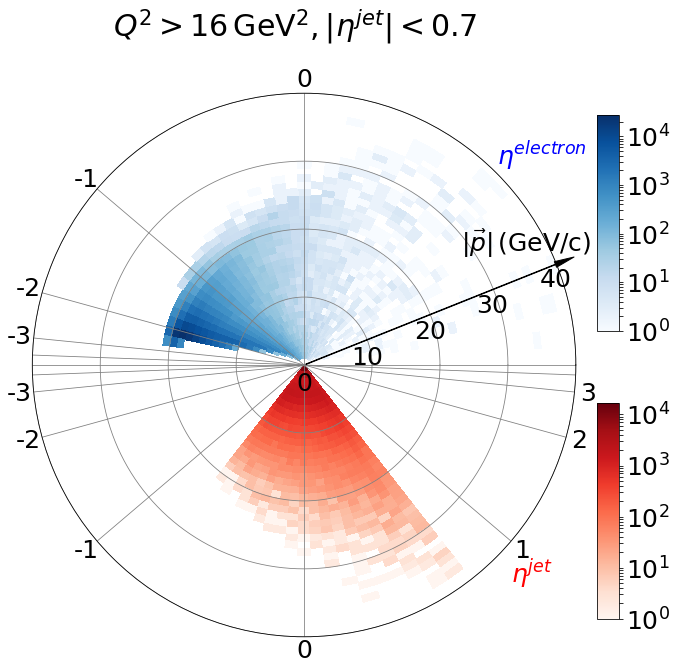

In [18]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111, polar=True)

r_edges = np.linspace(0, nr, nr + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(jj_e['p_electron'], jj_e['theta_electron'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(jj['p_jet'], jj['theta_jet_neg'], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = ax1.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = ax1.pcolormesh(Theta, R, H_q, cmap='Reds', norm=LogNorm())
ax1.set_rgrids(radii, labels=r_labels, fontsize=25)
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=25)
ax1.grid(color='grey')
cbar_e = fig.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
cbar_e.ax.tick_params(labelsize=25)
cbar_q = fig.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
cbar_q.ax.tick_params(labelsize=25)
fig.text(0.78,0.78,'$\eta^{electron}$',fontsize=25, color='b')
fig.text(0.8,0.2,'$\eta^{jet}$',fontsize=25, color='r')
ax1.annotate('', xy=(1,0.7), xycoords='axes fraction', xytext=(0.5,0.5), 
    arrowprops=dict(arrowstyle="Simple,tail_width=0.05,head_width=0.6,head_length=2", color='k'))
fig.text(0.73,0.66, r'$|\vec{p}| \, \mathrm{(GeV/c)}$',fontsize=25, color='k')
fig.suptitle('$Q^2 > 16 \, \mathrm{GeV^2}, |\eta^{jet}| < 0.7$', fontsize=30, y=1)
fig.savefig('images/polar_jet_test.pdf', bbox_inches='tight')